<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [3]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [6]:
df = pd.read_csv(breast_cancer_csv)
# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

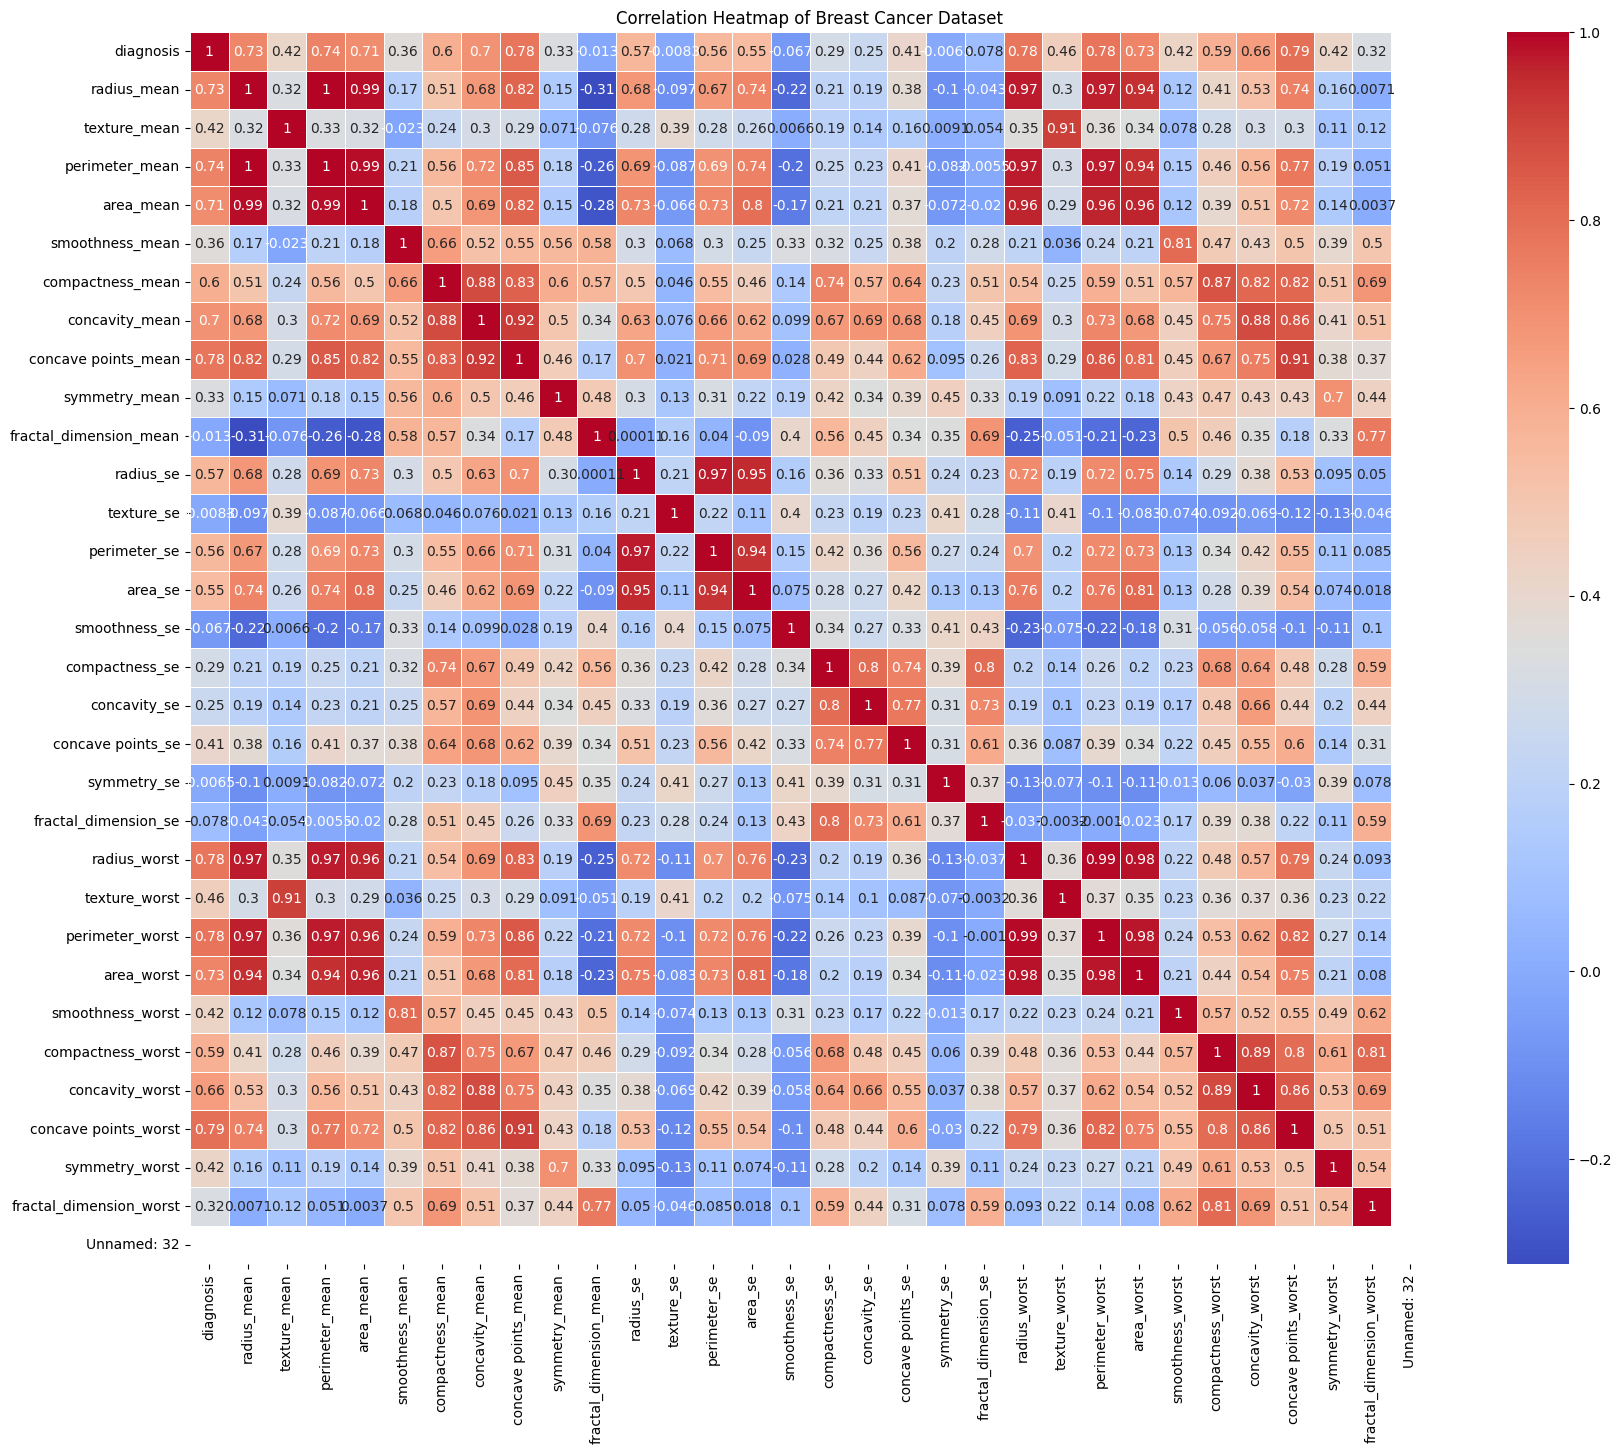

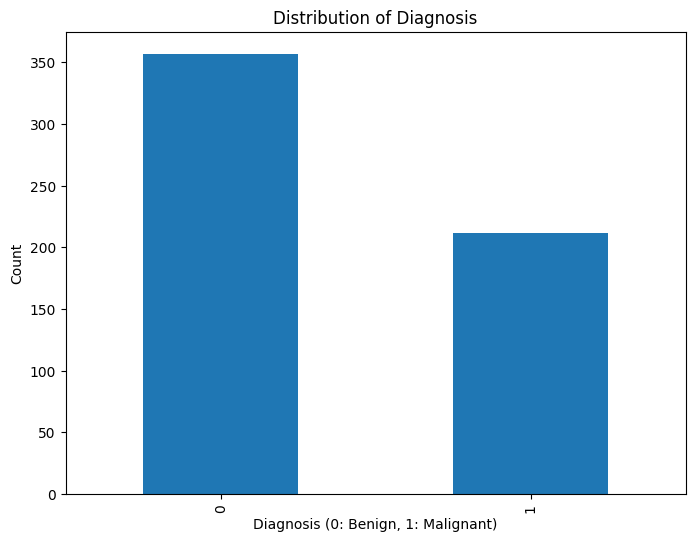

In [7]:
# Check for missing values
print(df.isnull().sum())

# Remove the 'id' column as it's not relevant for analysis
df = df.drop('id', axis=1)

# Encode the 'diagnosis' column: M (malignant) as 1, B (benign) as 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Dataset')
plt.show()

# Plot distribution of diagnosis
plt.figure(figsize=(8, 6))
df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()

In [11]:
# Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Drop rows with NA values
df = df.dropna()

# Remove the 'id' column as it's not relevant for analysis
df = df.drop('id', axis=1)

# Encode the 'diagnosis' column: M (malignant) as 1, B (benign) as 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

# Check for any remaining missing values
print("\nMissing values after preprocessing:")
print(df.isnull().sum())

# Display the shape of the cleaned dataset
print("\nShape of the cleaned dataset:", df.shape)

KeyError: "['id'] not found in axis"

### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis.

In [8]:
# ANSWER
# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)



C:\Users\Tien\anaconda3\envs\IOD\lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Tien\anaconda3\envs\IOD\lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Tien\anaconda3\envs\IOD\lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [9]:
# ANSWER
# Calculate correlation matrix of normalized data
correlation_matrix = np.corrcoef(X_normalized.T)

print("Shape of normalized data:", X_normalized.shape)
print("Shape of correlation matrix:", correlation_matrix.shape)

Shape of normalized data: (569, 31)
Shape of correlation matrix: (31, 31)


### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [10]:
# ANSWER
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Sort eigenvalues in descending order
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

print("Top 5 eigenvalues:", sorted_eigenvalues[:5])

LinAlgError: Array must not contain infs or NaNs

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues.

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [ ]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues

    Return a list or array containing the cumulative explained variance
    '''

    return cum_var_exp

In [ ]:
def plot_var_exp(eig_vals):

    cum_var_exp = calculate_cum_var_exp(eig_vals)

    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [ ]:
# ANSWER
# Create an instance of PCA

# Fit Xs

In [ ]:
# ANSWER
# Plot explained_variance_

In [ ]:
# ANSWER
# Apply dimensionality reduction to Xs using transform

In [ ]:
# ANSWER
# Create PairPlot of PCA

### 7. Split Data to 80/20 and use PCA prior to a supervised learning task

In this section we use PCA as a preprocessing step to a supervised learning algorithm.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Split the original dataset 80/20. Then apply standard scaler followed by PCA.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaler to X_train and X_test (fit_transform on X_train, transform on X_test):
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the PCA class and set at 16 components
...

# Apply PCA to the standardised features
X_train_scaled_pca = ...
X_test_scaled_pca = ...

Apply a KNN algorithm on `X_train_scaled` and `X_train_scaled_pca` with 5 neighbours, then evaluate using `X_test_scaled` and `X_test_scaled_pca`. Has performance been impacted as a result of dimension reduction?

In [ ]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled


# Test accuracy of KNN using standardised data


In [ ]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled_pca


# Test accuracy of KNN using standardised PCA-transformed data


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > Â© 2024 Institute of Data


---



---



